# May 29, 2024: check partition alignment in ModeClusterState

In [1]:
import os 
import numpy as np 
import pandas as pd
import pickle 

import graph_tool.all as gt

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams["errorbar.capsize"] = 0.5

import cmasher as cmr  # CITE ITS PAPER IN YOUR MANUSCRIPT

# ignore user warnings
import warnings
warnings.filterwarnings("ignore") #, category=UserWarning)

In [2]:
class ARGS():
    pass 

args = ARGS()

args.SEED = 100

def set_seed(args):
    gt.seed_rng(args.SEED)
    np.random.seed(args.SEED)

set_seed(args)

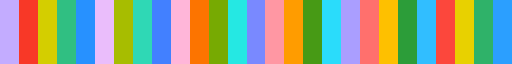

In [1]:
import colorcet as cc
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
import numpy as np 

colors_val = []
for idx in np.arange(5, 56, 10):
    colors_val += cc.CET_C6s[idx:256:55]
colors_val.pop(6)
colors_rgb = [colors.to_rgb(c) for c in colors_val]

cmap = LinearSegmentedColormap.from_list('custom_cmap', colors_rgb, N=len(colors_rgb))
display(cmap)

testing alignment with distinct (and same) set of labels

In [3]:
bs = [
    [0, 0, 0, 0, 1, 1, 1, 2, 2],
    [1, 0, 0, 0, 1, 1, 1, 2, 2],
    [0, 0, 2, 1, 1, 2, 2, 2, 2],
]
pmode = gt.ModeClusterState(bs)
pmode.bs

[[array([0, 0, 0, 0, 1, 1, 1, 2, 2], dtype=int32)],
 [array([1, 0, 0, 0, 1, 1, 1, 2, 2], dtype=int32)],
 [array([0, 0, 2, 1, 1, 2, 2, 2, 2], dtype=int32)]]

In [4]:
bs = [
    [101, 101, 101, 101, 392, 392, 392, 20, 20],
    [119, 241, 241, 241, 119, 119, 119, 922, 922],
    [673, 673, 877, 402, 402, 877, 877, 877, 877],
]
pmode = gt.ModeClusterState(bs)
pmode.bs

[[array([0, 0, 0, 0, 1, 1, 1, 2, 2], dtype=int32)],
 [array([1, 0, 0, 0, 1, 1, 1, 2, 2], dtype=int32)],
 [array([0, 0, 2, 1, 1, 2, 2, 2, 2], dtype=int32)]]

In [5]:
bs = [
    [2, 2, 2, 2, 0, 0, 0, 1, 1],
    [2, 1, 1, 1, 2, 2, 2, 0, 0],
    [0, 0, 1, 2, 2, 1, 1, 1, 1],
]
pmode = gt.ModeClusterState(bs)
pmode.bs

[[array([0, 0, 0, 0, 1, 1, 1, 2, 2], dtype=int32)],
 [array([1, 0, 0, 0, 1, 1, 1, 2, 2], dtype=int32)],
 [array([0, 0, 2, 1, 1, 2, 2, 2, 2], dtype=int32)]]

real partitions

In [6]:
args.type = 'spatial'
args.roi_size = 225
args.maintain_symmetry = True
args.brain_div = 'whl'
args.num_rois = 162

DESC = (
    f'type-{args.type}'
    f'_size-{args.roi_size}'
    f'_symm-{args.maintain_symmetry}'
    f'_braindiv-{args.brain_div}'
    f'_nrois-{args.num_rois}'
)

args.unit = 'seswise' # runwise/seswise/subwise : unit sample of dataset
args.denst = 15 # density of fc matrix

BASE_path = f'{os.environ["HOME"]}/mouse_dataset'
PARCELS_path = f'{BASE_path}/parcels'
ROI_path = f'{BASE_path}/roi_results'
ROI_RESULTS_path = f'{ROI_path}/{DESC}/{args.unit}/density-{args.denst}'
FC_path = f'{ROI_RESULTS_path}/corr_mats'
SBM_path = f'{ROI_RESULTS_path}/sbms'
NPY_path = f'{ROI_RESULTS_path}/npy'
os.system(f'mkdir -p {NPY_path}')
NII_path = f'{ROI_RESULTS_path}/niis'
os.system(f'mkdir -p {NII_path}/indiv')
os.system(f'mkdir -p {NII_path}/group')

# sbm model class
args.dc = ''
args.sbm = 'a' 

In [7]:
with open(f'{os.environ["HOME"]}/Downloads/data_partition.pkl', 'rb') as f:
    [_, g] = pickle.load(f)

In [8]:
# with open(f'{NPY_path}/sbm-{args.dc}-{args.sbm}_desc-group-modes.npy', 'rb') as f:
#     mode_df = pickle.load(f)

# mode_df

In [9]:
with open(f'{NPY_path}/sbm-{args.dc}-{args.sbm}_desc-dfs.npy', 'rb') as f:
    dfs = pickle.load(f)
    
dfs

,sub,ses,run,mode,b
0,1,2,0,0,"[0, 1, 1, 2, 3, 0, 1, 0, 1, 3, 0, 1, 0, 0, 0, ..."
1,1,2,0,1,"[0, 1, 1, 2, 3, 0, 1, 0, 1, 3, 0, 1, 0, 0, 0, ..."
2,1,2,0,2,"[0, 1, 1, 2, 3, 0, 1, 0, 1, 3, 0, 1, 0, 0, 0, ..."
3,1,3,0,0,"[0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ..."
4,1,3,0,1,"[0, 1, 1, 3, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ..."
...,...,...,...,...,...
169,10,1,0,5,"[6, 1, 1, 2, 2, 3, 1, 5, 3, 1, 0, 1, 4, 2, 5, ..."
170,10,2,0,0,"[8, 1, 1, 5, 2, 6, 1, 7, 5, 1, 2, 1, 3, 2, 7, ..."
171,10,2,0,1,"[6, 1, 1, 5, 3, 9, 1, 5, 7, 1, 2, 1, 0, 2, 0, ..."
172,10,2,0,2,"[7, 1, 1, 3, 3, 5, 1, 3, 3, 1, 9, 1, 5, 9, 4, ..."


In [10]:
# offsets = np.arange()
for idx, row in dfs.iterrows():
    b = row['b']
    label_map = np.random.randint(500, 2500, np.unique(b).max()+1)
    b_ = [label_map[b[i]] for i in range(len(b))]
    row['b'] = b_
    dfs.iloc[idx] = row

In [11]:
dfs['b']

0      [2044, 1292, 1292, 2359, 2395, 2044, 1292, 204...
1      [579, 2468, 2468, 2430, 850, 579, 2468, 579, 2...
2      [2390, 553, 553, 2102, 2262, 2390, 553, 2390, ...
3      [1302, 1509, 1509, 1252, 1302, 1302, 1509, 130...
4      [1752, 2399, 2399, 2094, 1752, 1752, 2399, 175...
                             ...                        
169    [2362, 1837, 1837, 1943, 1943, 859, 1837, 753,...
170    [1787, 697, 697, 1759, 552, 1603, 697, 984, 17...
171    [2228, 2078, 2078, 1800, 740, 1194, 2078, 1800...
172    [2437, 1394, 1394, 600, 600, 2405, 1394, 600, ...
173    [2288, 598, 598, 745, 840, 840, 598, 840, 1463...
Name: b, Length: 174, dtype: object

In [12]:
set_seed(args)
pmode = gt.ModeClusterState(dfs['b'].to_list())
pmode.relabel()
gt.mcmc_equilibrate(pmode, wait=1, mcmc_args=dict(niter=1, beta=np.inf))

(31134.25837977341, 4182, 1252)

In [13]:
def group_modes(args, pmode):
    mode_df = []
    M = len(pmode.bs)
    for idx_mode, mode in enumerate(pmode.get_modes()):
        omega = mode.get_M() / M
        sigma = mode.posterior_cdev()
        try: ratio = omega/sigma
        except: ratio = 0.0
        df = pd.DataFrame({
            'mode_id':[idx_mode],
            'mode':[mode],
            'omega':[omega],
            'sigma':[sigma],
            'ratio':[ratio],
            'b':[list(mode.get_max(g))],
        })
        mode_df.append(df)
    mode_df = pd.concat(mode_df).reset_index(drop=True)
    
    set_seed(args)
    # realign the final mode-partitions to ensure they align
    # and also align them for ease of visualization
    pmode_ = gt.ModeClusterState(mode_df['b'].to_list())
    mode_df['b'] = [list(b[0]) for b in pmode_.bs]
    return mode_df

if args.sbm in ['a', 'd']:
    mode_df = group_modes(args, pmode)

mode_df

,mode_id,mode,omega,sigma,ratio,b
0,0,<graph_tool.inference.partition_modes.Partitio...,0.810345,0.307723,2.633361,"[0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ..."
1,1,<graph_tool.inference.partition_modes.Partitio...,0.103448,0.112140,0.922493,"[0, 1, 6, 3, 0, 0, 1, 0, 1, 1, 0, 5, 0, 0, 0, ..."
2,2,<graph_tool.inference.partition_modes.Partitio...,0.045977,0.100309,0.458355,"[0, 5, 5, 3, 7, 2, 5, 0, 5, 5, 1, 5, 1, 0, 2, ..."
3,3,<graph_tool.inference.partition_modes.Partitio...,0.040230,0.064374,0.624941,"[0, 1, 1, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."


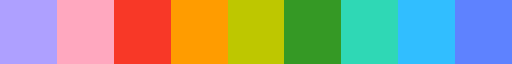

[Text(0.5, 1.0, 'mode partitions'),
 Text(15.72222222222222, 0.5, 'roi'),
 Text(0.5, 75.7222222222222, 'mode')]

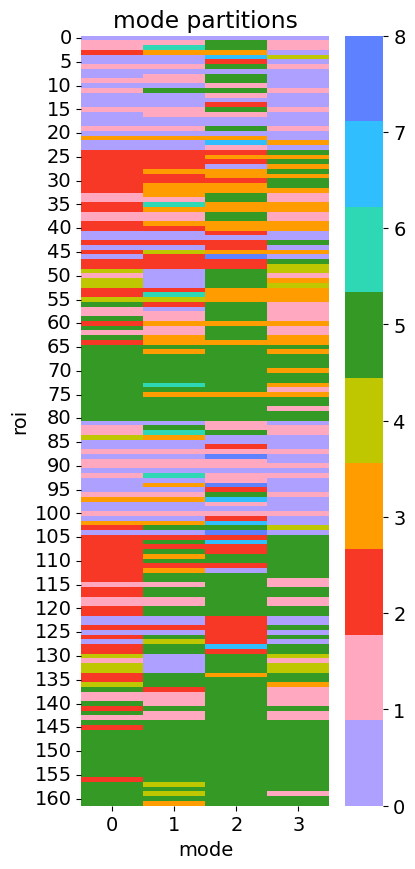

In [14]:
# perceptually uniform custom colormap
import colorcet as cc
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
def get_uniform_colors():
    colors_val = []
    stop = 30
    for idx in np.arange(0, stop, 3):
        colors_val += cc.CET_C6s[idx:256:stop]
    colors_rgb = [colors.to_rgb(c) for c in colors_val]
    return colors_val, colors_rgb

colors_val, colors_rgb = get_uniform_colors()

bs = np.stack(mode_df['b'].to_list()).T
max_num_colors = np.max(bs)+1
colors_val = colors_val[:max_num_colors]
colors_rgb = colors_rgb[:max_num_colors]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors_rgb, N=len(colors_rgb))
display(cmap)

fig, axs = plt.subplots(1, 1, figsize=(4, 10))
ax = axs
sns.heatmap(bs, ax=ax, cmap=cmap)
ax.set(title=f'mode partitions', ylabel=f'roi', xlabel=f'mode')